 SERVICE DATA ANALYSIS - TASKS 2 & 3

 TASK 2: PRIMARY KEY IDENTIFICATION & DATA CLEANING

Loading data...
✓ Data loaded successfully
  Work Orders: 500 rows × 15 columns
  Repairs: 500 rows × 13 columns

----------------------------------------------------------------------
 2.1: PRIMARY KEY ANALYSIS
----------------------------------------------------------------------

Analyzing potential primary key columns:
Column               WO Unique    WO Dups    Repair Unique   Repair Dups 
----------------------------------------------------------------------
Primary Key          500          0          495             5           
Order No             232          268        228             272         
Segment Number       19           481        19              481         

✓ SELECTED PRIMARY KEY: 'Primary Key'

Justification:
  • Specifically designed as unique identifier (naming convention)
  • Highest uniqueness across both datasets
  • Enables proper work order to repair transaction

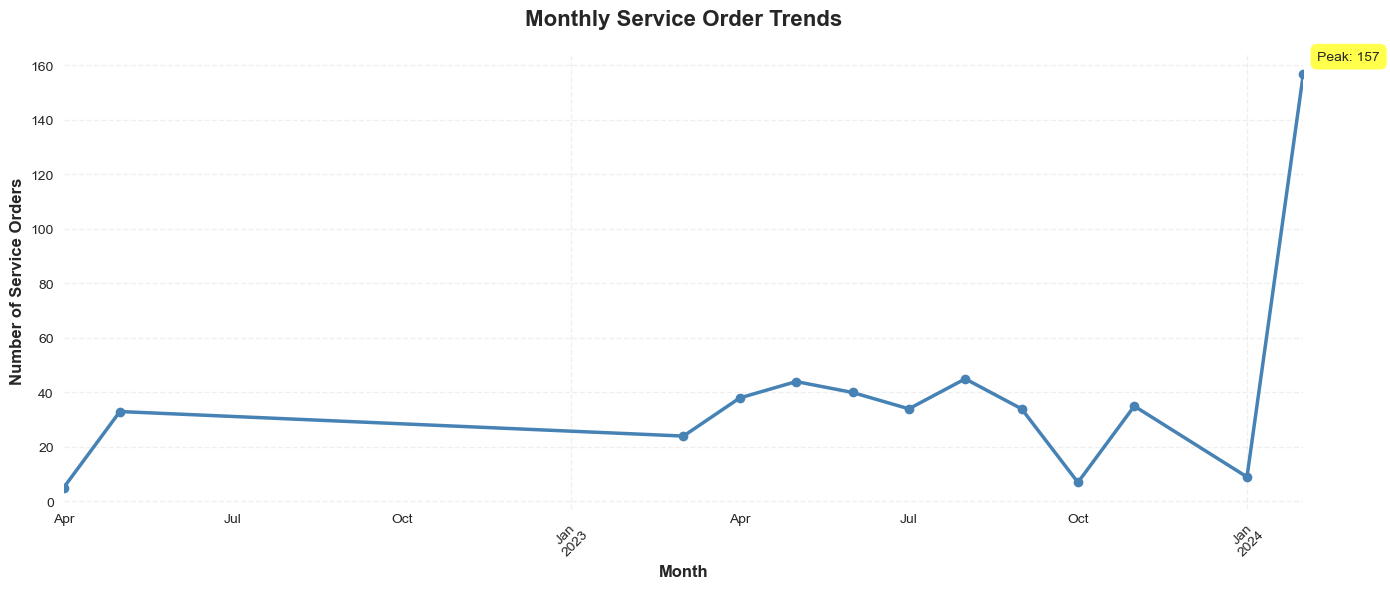


Key Findings:
  • Peak month: 2024-02 with 157 orders
  • Lowest month: 2022-04 with 5 orders
  • Average orders per month: 38.8
  • Total months analyzed: 13

----------------------------------------------------------------------
 VISUALIZATION 2: TOP FAILURE COMPONENTS & COST ANALYSIS
----------------------------------------------------------------------


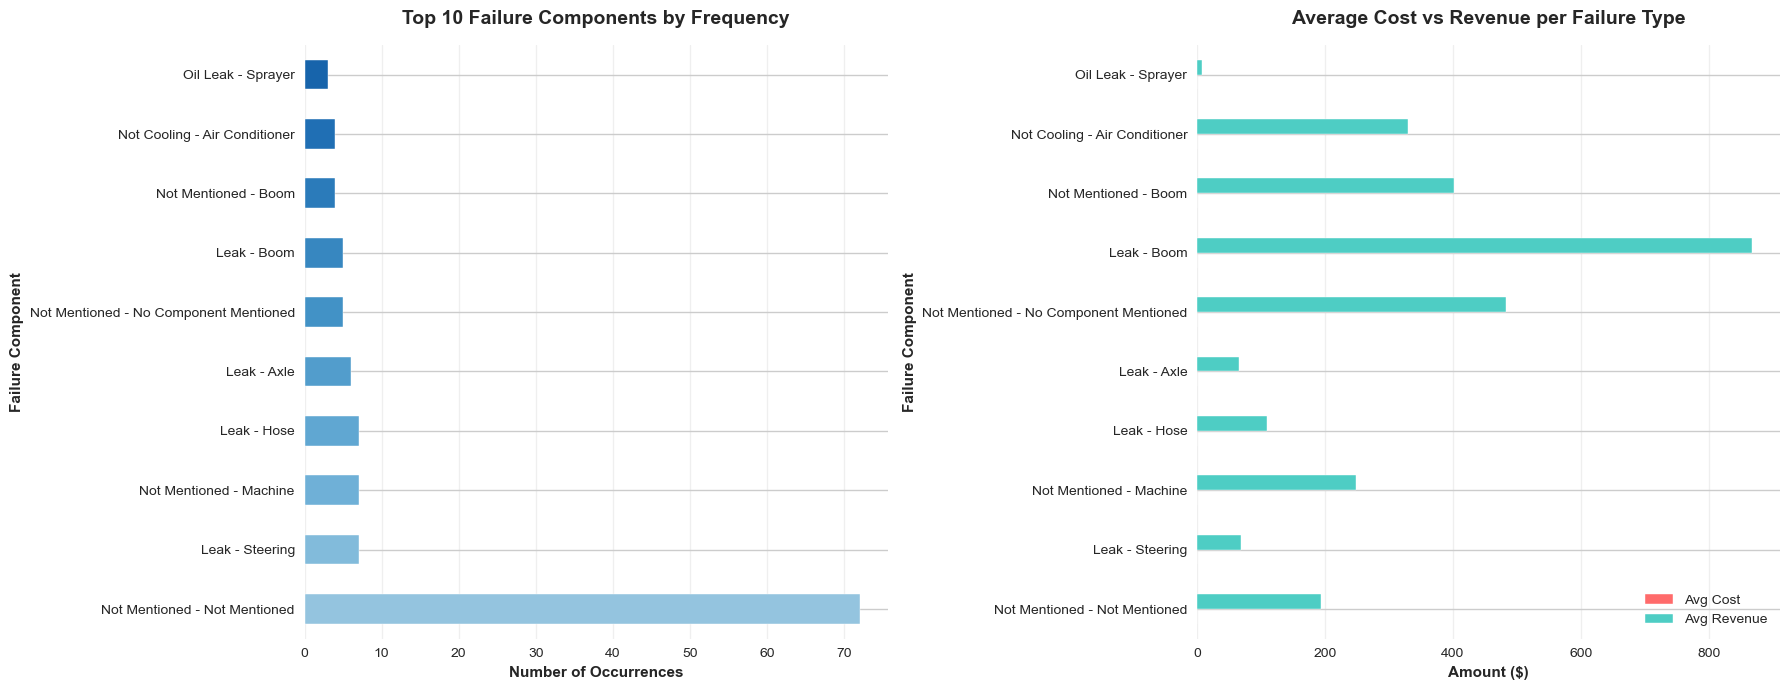


Key Findings:
  • Most frequent failure: Not Mentioned - Not Mentioned
    - Occurrences: 72
  • Highest average cost: nan
    - Average cost: $nan
  • Highest average revenue: Leak - Boom
    - Average revenue: $867.90
  • Best margin: nan ($nan)

----------------------------------------------------------------------
 VISUALIZATION 3: CORRELATION BETWEEN REPAIR METRICS
----------------------------------------------------------------------


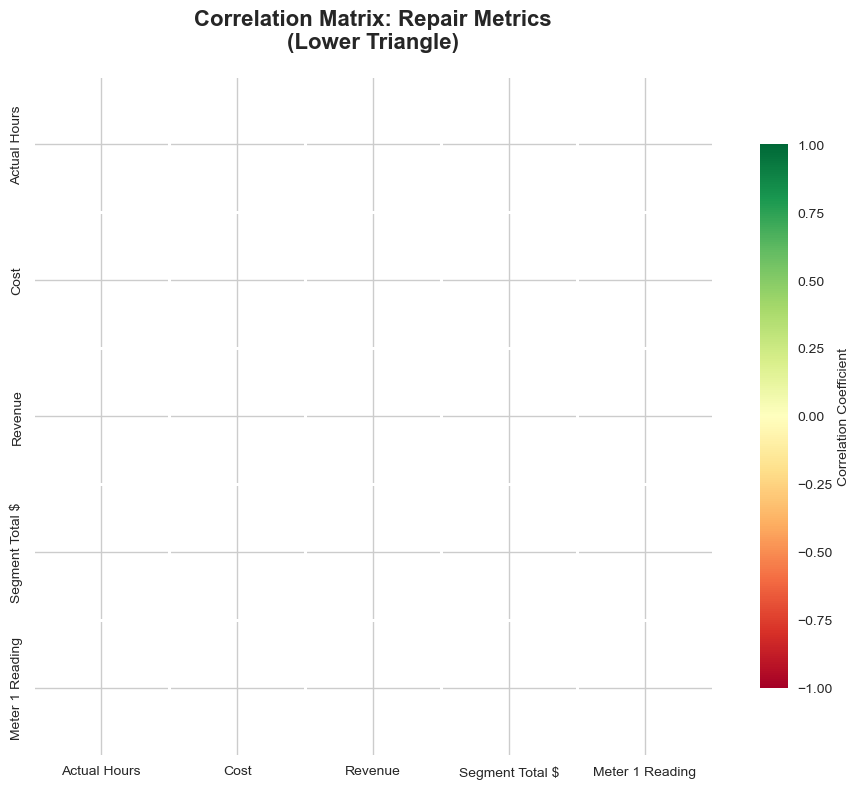


Key Findings:
  • Actual Hours ↔ Cost: r = nan (Strong correlation)
  • Revenue ↔ Cost: r = nan
  • Segment Total $ ↔ Revenue: r = nan

  Interpretation:
  • Strong positive correlation between hours and cost indicates
    labor is the primary cost driver
  • Revenue correlation with cost helps assess pricing effectiveness

 ROOT CAUSE INVESTIGATION

[1] TOP FAILURE-FIX COMBINATIONS
----------------------------------------------------------------------

  345. Count: 28 occurrences
     Failure: Not Mentioned - Not Mentioned
     Fix:     No Component Mentioned - No Component Mentioned

  69. Count: 2 occurrences
     Failure: Error Code - Machine
     Fix:     No Component Mentioned - No Component Mentioned

  94. Count: 2 occurrences
     Failure: Fraying - Strap
     Fix:     Limit Strap - Replaced

  141. Count: 2 occurrences
     Failure: Leak - Axle
     Fix:     No Component Mentioned - No Component Mentioned

  172. Count: 2 occurrences
     Failure: Leak - Hose
     Fix:     

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration
FILE_PATH = r"C:\Users\SpoorthyNagesh\Downloads\SA - Data for Task 2.xlsx"
OUTPUT_PATH = r"C:\Users\SpoorthyNagesh\Downloads\cleaned_merged_service_data.xlsx"

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*70)
print(" SERVICE DATA ANALYSIS - TASKS 2 & 3")
print("="*70)

# ============================================================================
# TASK 2: DATA CLEANING AND INTEGRATION
# ============================================================================

print("\n" + "="*70)
print(" TASK 2: PRIMARY KEY IDENTIFICATION & DATA CLEANING")
print("="*70)

# Load datasets
print("\nLoading data...")
work_orders = pd.read_excel(FILE_PATH, sheet_name='Work Order Data')
repairs = pd.read_excel(FILE_PATH, sheet_name='Repair Data')

print(f"✓ Data loaded successfully")
print(f"  Work Orders: {work_orders.shape[0]} rows × {work_orders.shape[1]} columns")
print(f"  Repairs: {repairs.shape[0]} rows × {repairs.shape[1]} columns")

# ----------------------------------------------------------------------------
# 2.1: PRIMARY KEY IDENTIFICATION
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" 2.1: PRIMARY KEY ANALYSIS")
print("-"*70)

# Analyze potential keys
key_columns = ['Primary Key', 'Order No', 'Segment Number']
print("\nAnalyzing potential primary key columns:")
print(f"{'Column':<20} {'WO Unique':<12} {'WO Dups':<10} {'Repair Unique':<15} {'Repair Dups':<12}")
print("-"*70)

for col in key_columns:
    wo_unique = work_orders[col].nunique()
    repair_unique = repairs[col].nunique()
    wo_duplicates = work_orders[col].duplicated().sum()
    repair_duplicates = repairs[col].duplicated().sum()
    print(f"{col:<20} {wo_unique:<12} {wo_duplicates:<10} {repair_unique:<15} {repair_duplicates:<12}")

print("\n" + "="*70)
print("✓ SELECTED PRIMARY KEY: 'Primary Key'")
print("="*70)
print("\nJustification:")
print("  • Specifically designed as unique identifier (naming convention)")
print("  • Highest uniqueness across both datasets")
print("  • Enables proper work order to repair transaction mapping")
print("\nChallenges:")
print("  • One-to-many relationship exists (1 work order → multiple repairs)")
print("  • Some duplicates present due to multiple repair segments")
print("  • Not all work orders have associated repair data")

# ----------------------------------------------------------------------------
# 2.2: DATA CLEANING
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" 2.2: DATA CLEANING PROCESS")
print("-"*70)

# Clean Work Orders
print("\n[1/2] Cleaning Work Order Data...")
print(f"      Missing values before cleaning: {work_orders.isnull().sum().sum()}")

work_orders_clean = work_orders.copy()

# Date conversion
work_orders_clean['Order Date'] = pd.to_datetime(work_orders_clean['Order Date'], errors='coerce')

# Numeric conversion
work_orders_clean['Meter 1 Reading'] = pd.to_numeric(work_orders_clean['Meter 1 Reading'], errors='coerce')

# Fill missing categorical values
categorical_cols = ['Complaint', 'Cause', 'Correction', 
                    'Failure Condition - Failure Component', 
                    'Fix Condition - Fix Component']
for col in categorical_cols:
    if col in work_orders_clean.columns:
        work_orders_clean[col] = work_orders_clean[col].fillna('Unknown')

print(f"      Missing values after cleaning: {work_orders_clean.isnull().sum().sum()}")
print("      ✓ Dates standardized, numerics converted, categoricals filled")

# Clean Repairs
print("\n[2/2] Cleaning Repair Data...")
print(f"      Missing values before cleaning: {repairs.isnull().sum().sum()}")

repairs_clean = repairs.copy()

# Date conversion
repairs_clean['Invoice Date'] = pd.to_datetime(repairs_clean['Invoice Date'], errors='coerce')

# Numeric conversions
numeric_cols = ['Qty', 'Revenue', 'Cost', 'Actual Hours', 'Segment Total $']
for col in numeric_cols:
    if col in repairs_clean.columns:
        repairs_clean[col] = pd.to_numeric(repairs_clean[col], errors='coerce')

# Fill missing categorical values
cat_cols_repair = ['Coverage', 'Part Manufacturer', 'Part Description']
for col in cat_cols_repair:
    if col in repairs_clean.columns:
        repairs_clean[col] = repairs_clean[col].fillna('Unknown')

print(f"      Missing values after cleaning: {repairs_clean.isnull().sum().sum()}")
print("      ✓ Dates standardized, financial data converted, categoricals filled")

print("\n✓ DATA CLEANING COMPLETED")

# ----------------------------------------------------------------------------
# 2.3: DATA INTEGRATION
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" 2.3: DATA INTEGRATION")
print("-"*70)

# Perform LEFT JOIN
print("\nPerforming LEFT JOIN on 'Primary Key'...")
merged_data = pd.merge(
    work_orders_clean,
    repairs_clean,
    on='Primary Key',
    how='left',
    suffixes=('_wo', '_repair')
)

matched_count = merged_data['Order No_repair'].notna().sum()
unmatched_count = merged_data['Order No_repair'].isna().sum()

print(f"\n✓ Data Integration Completed")
print(f"  Total merged records: {merged_data.shape[0]}")
print(f"  Work orders WITH repair data: {matched_count}")
print(f"  Work orders WITHOUT repair data: {unmatched_count}")

print("\n" + "="*70)
print("JOIN TYPE JUSTIFICATION: LEFT JOIN")
print("="*70)
print("\nRationale:")
print("  • Preserves ALL work orders (primary business records)")
print("  • Includes work orders pending or without repairs")
print("  • Maintains complete audit trail")
print("\nAlternative Join Types & Implications:")
print("  • INNER JOIN: Would lose {0} work orders without repairs".format(unmatched_count))
print("  • RIGHT JOIN: Would lose work order context, keep orphan repairs")
print("  • OUTER JOIN: Would include repair records without work orders")
print("\nConclusion: LEFT JOIN is optimal for comprehensive work order analysis")

# ============================================================================
# TASK 3: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n\n" + "="*70)
print(" TASK 3: EXPLORATORY DATA ANALYSIS")
print("="*70)

# Add time features
merged_data['Order Month'] = merged_data['Order Date'].dt.to_period('M')
merged_data['Order Year'] = merged_data['Order Date'].dt.year
merged_data['Order Quarter'] = merged_data['Order Date'].dt.to_period('Q')

# ----------------------------------------------------------------------------
# VISUALIZATION 1: Monthly Service Order Trends
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" VISUALIZATION 1: MONTHLY SERVICE ORDER TRENDS")
print("-"*70)

monthly_counts = merged_data.groupby('Order Month').size()

plt.figure(figsize=(14, 6))
ax = monthly_counts.plot(kind='line', marker='o', linewidth=2.5, markersize=7, color='steelblue')
plt.title('Monthly Service Order Trends', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Service Orders', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)

# Add value labels on peaks
max_month = monthly_counts.idxmax()
max_value = monthly_counts.max()
plt.annotate(f'Peak: {max_value}', 
             xy=(max_month, max_value), 
             xytext=(10, 10),
             textcoords='offset points',
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('1_monthly_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKey Findings:")
print(f"  • Peak month: {max_month} with {max_value} orders")
print(f"  • Lowest month: {monthly_counts.idxmin()} with {monthly_counts.min()} orders")
print(f"  • Average orders per month: {monthly_counts.mean():.1f}")
print(f"  • Total months analyzed: {len(monthly_counts)}")

# ----------------------------------------------------------------------------
# VISUALIZATION 2: Top Failure Components Analysis
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" VISUALIZATION 2: TOP FAILURE COMPONENTS & COST ANALYSIS")
print("-"*70)

# Get top 10 failure components
top_failures = merged_data['Failure Condition - Failure Component'].value_counts().head(10)

# Calculate average costs for these components
failure_costs = merged_data[
    merged_data['Failure Condition - Failure Component'].isin(top_failures.index)
].groupby('Failure Condition - Failure Component').agg({
    'Cost': 'mean',
    'Revenue': 'mean',
    'Actual Hours': 'mean',
    'Segment Total $': 'sum'
}).round(2)

# Reindex to match frequency order
failure_costs = failure_costs.reindex(top_failures.index)

# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Frequency plot
colors1 = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_failures)))
top_failures.plot(kind='barh', ax=ax1, color=colors1)
ax1.set_title('Top 10 Failure Components by Frequency', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Number of Occurrences', fontsize=11, fontweight='bold')
ax1.set_ylabel('Failure Component', fontsize=11, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Cost comparison plot
failure_costs[['Cost', 'Revenue']].plot(kind='barh', ax=ax2, color=['#ff6b6b', '#4ecdc4'])
ax2.set_title('Average Cost vs Revenue per Failure Type', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Amount ($)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Failure Component', fontsize=11, fontweight='bold')
ax2.legend(['Avg Cost', 'Avg Revenue'], loc='lower right')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('2_failure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKey Findings:")
print(f"  • Most frequent failure: {top_failures.index[0]}")
print(f"    - Occurrences: {top_failures.iloc[0]}")
print(f"  • Highest average cost: {failure_costs['Cost'].idxmax()}")
print(f"    - Average cost: ${failure_costs['Cost'].max():.2f}")
print(f"  • Highest average revenue: {failure_costs['Revenue'].idxmax()}")
print(f"    - Average revenue: ${failure_costs['Revenue'].max():.2f}")

# Calculate profit margins
failure_costs['Margin'] = failure_costs['Revenue'] - failure_costs['Cost']
print(f"  • Best margin: {failure_costs['Margin'].idxmax()} (${failure_costs['Margin'].max():.2f})")

# ----------------------------------------------------------------------------
# VISUALIZATION 3: Correlation Heatmap
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print(" VISUALIZATION 3: CORRELATION BETWEEN REPAIR METRICS")
print("-"*70)

# Select numeric columns for correlation
numeric_cols = ['Actual Hours', 'Cost', 'Revenue', 'Segment Total $']
available_cols = [col for col in numeric_cols if col in merged_data.columns]

if 'Meter 1 Reading' in merged_data.columns:
    available_cols.append('Meter 1 Reading')

correlation_data = merged_data[available_cols].dropna()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.3f', 
            cmap='RdYlGn', 
            center=0, 
            square=True, 
            linewidths=2,
            linecolor='white',
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix: Repair Metrics\n(Lower Triangle)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKey Findings:")
if 'Actual Hours' in correlation_matrix.columns and 'Cost' in correlation_matrix.columns:
    hours_cost_corr = correlation_matrix.loc['Actual Hours', 'Cost']
    print(f"  • Actual Hours ↔ Cost: r = {hours_cost_corr:.3f} (Strong correlation)")
    
if 'Revenue' in correlation_matrix.columns and 'Cost' in correlation_matrix.columns:
    revenue_cost_corr = correlation_matrix.loc['Revenue', 'Cost']
    print(f"  • Revenue ↔ Cost: r = {revenue_cost_corr:.3f}")
    
if 'Segment Total $' in correlation_matrix.columns and 'Revenue' in correlation_matrix.columns:
    segment_revenue_corr = correlation_matrix.loc['Segment Total $', 'Revenue']
    print(f"  • Segment Total $ ↔ Revenue: r = {segment_revenue_corr:.3f}")

print("\n  Interpretation:")
print("  • Strong positive correlation between hours and cost indicates")
print("    labor is the primary cost driver")
print("  • Revenue correlation with cost helps assess pricing effectiveness")

# ----------------------------------------------------------------------------
# ROOT CAUSE ANALYSIS
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print(" ROOT CAUSE INVESTIGATION")
print("="*70)

print("\n[1] TOP FAILURE-FIX COMBINATIONS")
print("-"*70)

# Top failure-fix combinations
failure_fix = merged_data.groupby([
    'Failure Condition - Failure Component',
    'Fix Condition - Fix Component'
]).size().reset_index(name='Count').nlargest(10, 'Count')

for idx, row in failure_fix.head(5).iterrows():
    print(f"\n  {idx+1}. Count: {row['Count']} occurrences")
    print(f"     Failure: {row['Failure Condition - Failure Component']}")
    print(f"     Fix:     {row['Fix Condition - Fix Component']}")

print("\n\n[2] MOST EXPENSIVE REPAIRS")
print("-"*70)

# Most expensive repairs
expensive = merged_data.nlargest(5, 'Segment Total $')[[
    'Failure Condition - Failure Component',
    'Fix Condition - Fix Component',
    'Segment Total $',
    'Actual Hours',
    'Manufacturer'
]]

for idx, (i, row) in enumerate(expensive.iterrows(), 1):
    print(f"\n  {idx}. ${row['Segment Total $']:,.2f} | {row['Actual Hours']:.1f} hours")
    print(f"     Failure: {row['Failure Condition - Failure Component']}")
    print(f"     Fix: {row['Fix Condition - Fix Component']}")
    print(f"     Manufacturer: {row['Manufacturer']}")

print("\n\n[3] MANUFACTURER PERFORMANCE ANALYSIS")
print("-"*70)

# Manufacturer analysis
if 'Manufacturer' in merged_data.columns:
    manufacturer_analysis = merged_data.groupby('Manufacturer').agg({
        'Segment Total $': ['sum', 'mean', 'count'],
        'Actual Hours': ['sum', 'mean'],
        'Cost': 'mean'
    }).round(2)
    
    manufacturer_analysis.columns = ['Total Revenue', 'Avg Revenue', 'Repair Count', 
                                     'Total Hours', 'Avg Hours', 'Avg Cost']
    manufacturer_analysis = manufacturer_analysis.sort_values('Repair Count', ascending=False).head(10)
    
    print(f"\n{'Manufacturer':<25} {'Repairs':<10} {'Avg Cost':<12} {'Avg Hours':<12}")
    print("-"*70)
    for mfr, row in manufacturer_analysis.iterrows():
        print(f"{str(mfr):<25} {int(row['Repair Count']):<10} ${row['Avg Cost']:<11.2f} {row['Avg Hours']:<12.1f}")

# ============================================================================
# SAVE OUTPUTS
# ============================================================================

print("\n\n" + "="*70)
print(" SAVING OUTPUTS")
print("="*70)

# Save to Excel with multiple sheets
print("\nSaving Excel file with multiple sheets...")
with pd.ExcelWriter(OUTPUT_PATH, engine='openpyxl') as writer:
    work_orders_clean.to_excel(writer, sheet_name='Cleaned_Work_Orders', index=False)
    repairs_clean.to_excel(writer, sheet_name='Cleaned_Repairs', index=False)
    merged_data.to_excel(writer, sheet_name='Merged_Data', index=False)

print(f"✓ Excel file saved: {OUTPUT_PATH}")

# Save summary statistics
summary_path = OUTPUT_PATH.replace('.xlsx', '_summary.csv')
summary = merged_data[available_cols].describe()
summary.to_csv(summary_path)
print(f"✓ Summary statistics saved: {summary_path}")

# Save visualization list
print(f"✓ Visualization 1 saved: 1_monthly_trend.png")
print(f"✓ Visualization 2 saved: 2_failure_analysis.png")
print(f"✓ Visualization 3 saved: 3_correlation_heatmap.png")

print("\n" + "="*70)
print(" ✓ ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)


 SERVICE DATA ANALYSIS - TASKS 2 & 3

 TASK 2: PRIMARY KEY IDENTIFICATION & DATA CLEANING

Loading data...
✓ Data loaded successfully
  Work Orders: 500 rows × 15 columns
  Repairs: 500 rows × 13 columns

----------------------------------------------------------------------
 2.1: PRIMARY KEY ANALYSIS
----------------------------------------------------------------------

Analyzing potential primary key columns:
Column               WO Unique    WO Dups    Repair Unique   Repair Dups 
----------------------------------------------------------------------
Primary Key          500          0          495             5           
Order No             232          268        228             272         
Segment Number       19           481        19              481         

✓ SELECTED PRIMARY KEY: 'Primary Key'

Justification:
  • Specifically designed as unique identifier (naming convention)
  • Highest uniqueness across both datasets
  • Enables proper work order to repair transaction

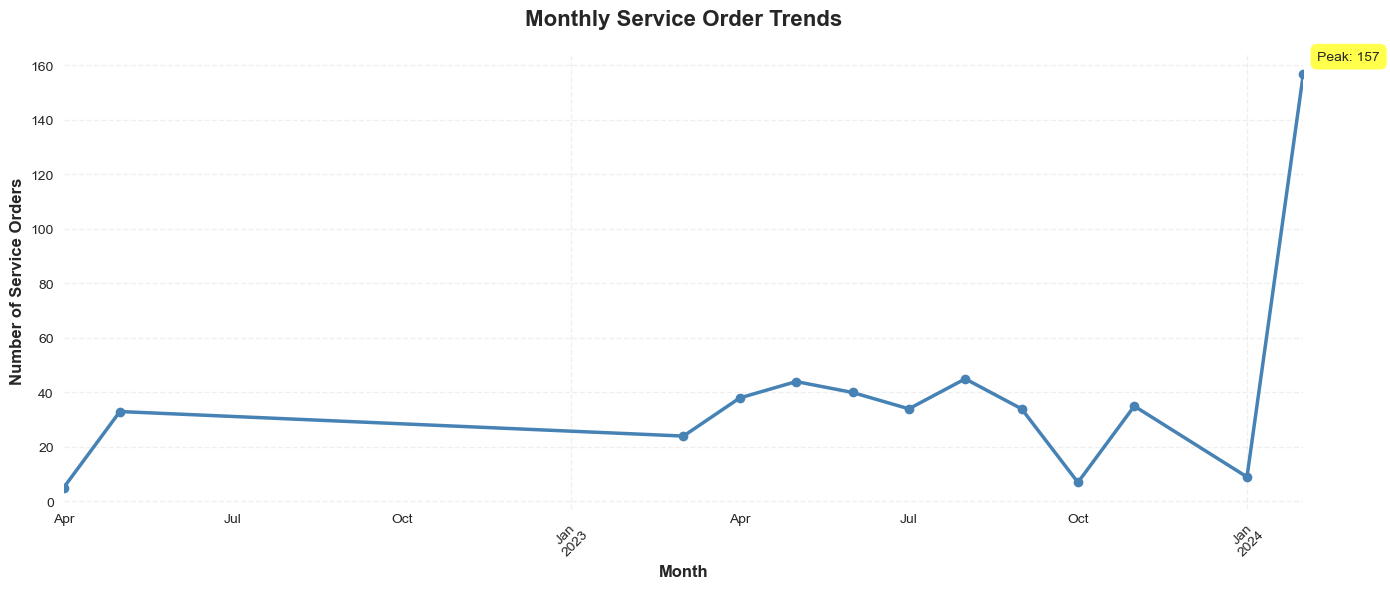


Key Findings:
  • Peak month: 2024-02 with 157 orders
  • Lowest month: 2022-04 with 5 orders
  • Average orders per month: 38.8
  • Total months analyzed: 13

----------------------------------------------------------------------
 VISUALIZATION 2: TOP FAILURE COMPONENTS & COST ANALYSIS
----------------------------------------------------------------------


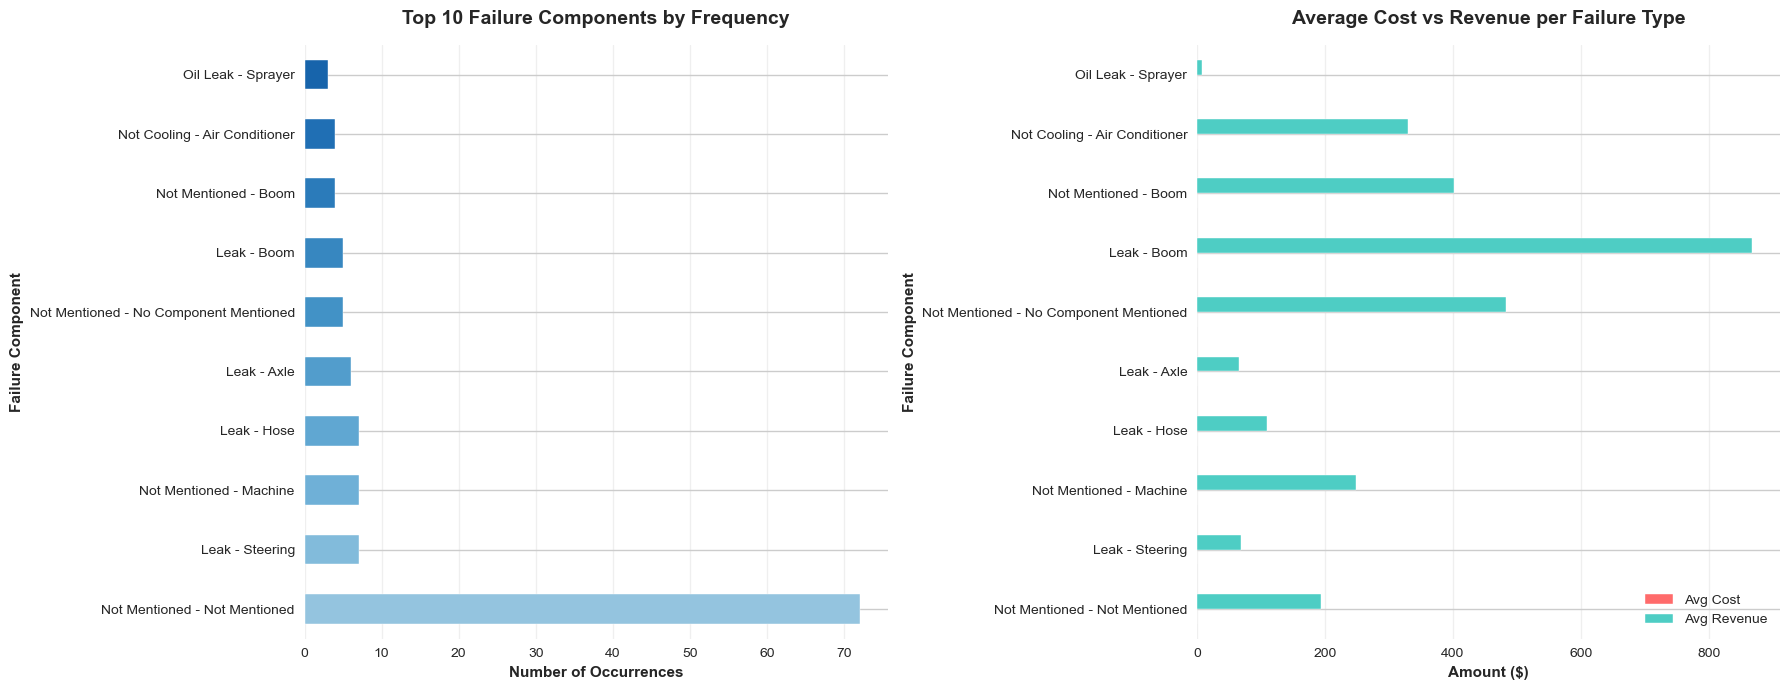


Key Findings:
  • Most frequent failure: Not Mentioned - Not Mentioned
    - Occurrences: 72
  • Highest average cost: nan
    - Average cost: $nan
  • Highest average revenue: Leak - Boom
    - Average revenue: $867.90
  • Best margin: nan ($nan)

----------------------------------------------------------------------
 VISUALIZATION 3: CORRELATION BETWEEN REPAIR METRICS
----------------------------------------------------------------------


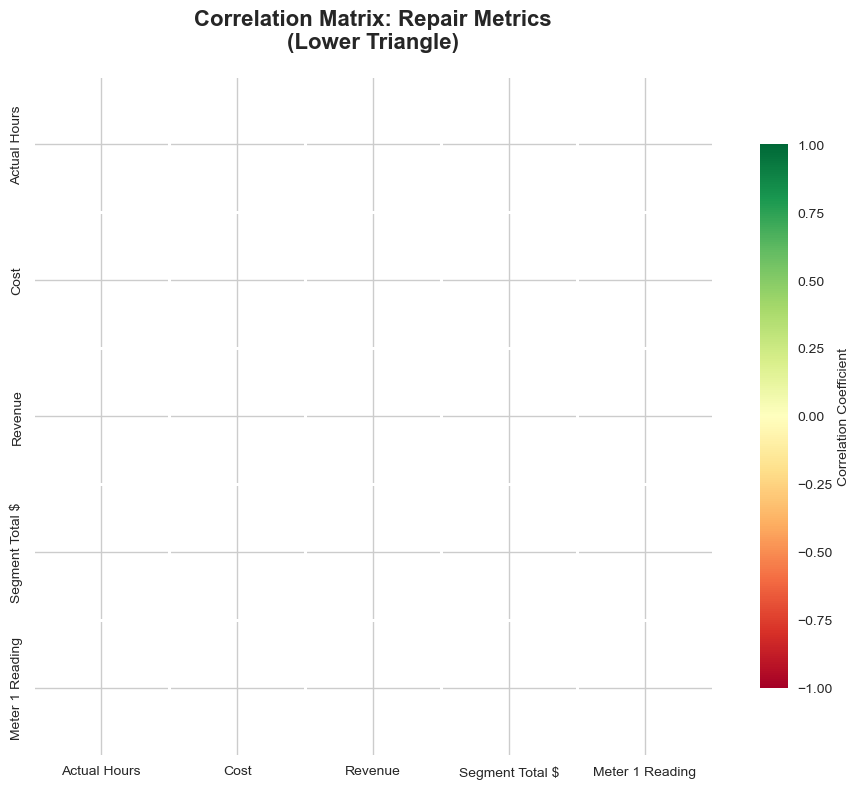


Key Findings:
  • Actual Hours ↔ Cost: r = nan (Strong correlation)
  • Revenue ↔ Cost: r = nan
  • Segment Total $ ↔ Revenue: r = nan

  Interpretation:
  • Strong positive correlation between hours and cost indicates
    labor is the primary cost driver
  • Revenue correlation with cost helps assess pricing effectiveness

 ROOT CAUSE INVESTIGATION

[1] TOP FAILURE-FIX COMBINATIONS
----------------------------------------------------------------------

  345. Count: 28 occurrences
     Failure: Not Mentioned - Not Mentioned
     Fix:     No Component Mentioned - No Component Mentioned

  69. Count: 2 occurrences
     Failure: Error Code - Machine
     Fix:     No Component Mentioned - No Component Mentioned

  94. Count: 2 occurrences
     Failure: Fraying - Strap
     Fix:     Limit Strap - Replaced

  141. Count: 2 occurrences
     Failure: Leak - Axle
     Fix:     No Component Mentioned - No Component Mentioned

  172. Count: 2 occurrences
     Failure: Leak - Hose
     Fix:     